# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

 ## Импорт pandas и вывод dataframe

In [1]:
import pandas as pd
%matplotlib inline

adult_data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
adult_data.shape

(32561, 15)

### Вопрос 1
Сколько мужчин и женщин в выборке?

Их количество можно посчитать с помощью функции .shape

Мужчины:

In [13]:
adult_data[adult_data['sex'] == 'Male'].shape[0]

21790

Женщины:

In [58]:
adult_data[adult_data['sex'] == 'Female'].shape[0]

10771

### Вопрос 2
Каков средний возраст мужчин?


Это можно посчитать с помощью функции .mean():

In [22]:
adult_data.groupby('sex')['age'].mean()[1]

39.433547498852683

### Вопрос 3
Какова доля граждан США?

In [54]:
adult_data[adult_data['native-country'] == 'United-States'].shape[0]/adult_data.shape[0]

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

Поскольку .plot.bar() работает с объектами типа DataFrame, нужно преобразовать данные adult_data['education'].value_counts() типа series в DataFrame, а только потом построить диаграмму:

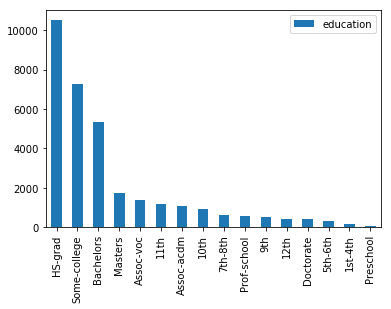

In [107]:
pd.DataFrame(adult_data['education'].value_counts()).plot.bar()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

Для этого можно воспользоваться функциями .mean() и .std():

In [8]:
adult_data[adult_data['marital-status'] == 'Divorced'][['fnlwgt']].mean()

fnlwgt    185802.790457
dtype: float64

In [9]:
adult_data[adult_data['marital-status'] == 'Divorced'][['fnlwgt']].std()

fnlwgt    105646.789459
dtype: float64

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Для того, чтобы проверить это, найдем долю людей с бакалаврской, магистерской или докторской степенью с зарплатой >50K, используя .shape:

In [229]:
adult_data[(adult_data['50K'] == '>50K') & 
           ((adult_data['education'] == 'Bachelors') | 
            (adult_data['education'] == 'Masters') | 
            (adult_data['education'] == 'Doctorate'))]['education'].shape[0]/adult_data[adult_data['50K'] == '>50K']['education'].shape[0]
        

0.4445861497258003

Оказывается, меньше половины людей с зарплатой выше 50k имеют высшее образование.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [213]:
adult_data.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

Для начала, найдем количество фермеров-рыбаков по всем странам странам:

In [16]:
t = adult_data[adult_data['occupation'] == 'Farming-fishing']['native-country'].value_counts()

Теперь можно вывести все страны:

In [17]:
t.index

Index(['United-States', 'Mexico', 'Puerto-Rico', '?', 'Philippines',
       'Guatemala', 'Vietnam', 'Canada', 'Cuba', 'El-Salvador', 'Italy',
       'Yugoslavia', 'Germany', 'Ireland', 'France', 'Hong', 'Cambodia',
       'Poland', 'Portugal', 'Japan', 'England'],
      dtype='object')

Далее, можно убрать неизвестные страны под индексом '?', испольуя list comprehesion:

In [20]:
[i for i in t.index if i != '?']

['United-States',
 'Mexico',
 'Puerto-Rico',
 'Philippines',
 'Guatemala',
 'Vietnam',
 'Canada',
 'Cuba',
 'El-Salvador',
 'Italy',
 'Yugoslavia',
 'Germany',
 'Ireland',
 'France',
 'Hong',
 'Cambodia',
 'Poland',
 'Portugal',
 'Japan',
 'England']

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [183]:
adult_data[(adult_data.sex == 'Male') & (adult_data.education == 'Bachelors')].shape[0]/adult_data[(adult_data.sex == 'Male') & (adult_data.education == 'Masters')].shape[0]

3.14743049705139

In [184]:
adult_data[(adult_data.sex == 'Female') & (adult_data.education == 'Bachelors')].shape[0]/adult_data[(adult_data.sex == 'Female') & (adult_data.education == 'Masters')].shape[0]

3.0205223880597014

Оказывается данное отношение для мужчин выше, чем для женщин.

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

Найдем максимум:

In [23]:
max = adult_data['hours-per-week'].max()
max

99

Теперь найдем, сколько таких трудоголиков:

In [26]:
adult_data[adult_data['hours-per-week'] == max][['50K']].shape[0]

85

Таким образом можно вывести, сколько они зарабатывают:

In [25]:
adult_data[adult_data['hours-per-week'] == max]['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64